# Data Science Portfolio Project - K-means

## When and What Type of Data and Model to be used
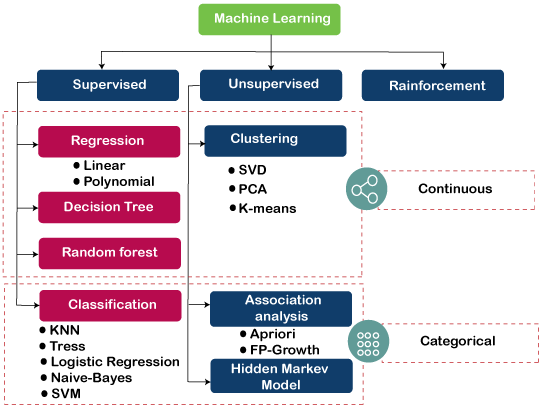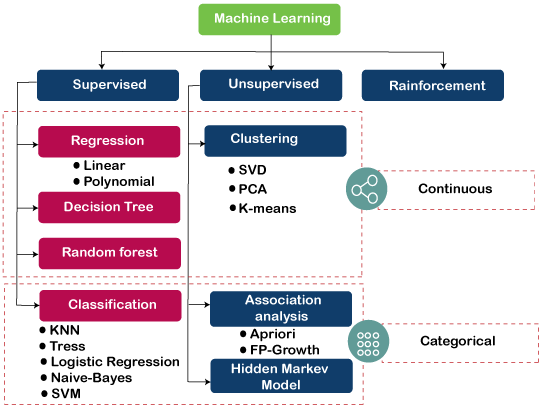

In [7]:
import pandas as pd

In [11]:
df = pd.read_csv('Mall_Customers.csv')

In [13]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [15]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
df.rename(columns = {'Annual Income (k$)': 'AnnualIncome', 'Spending Score (1-100)': 'SpendingScore'}, inplace = True )

In [21]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

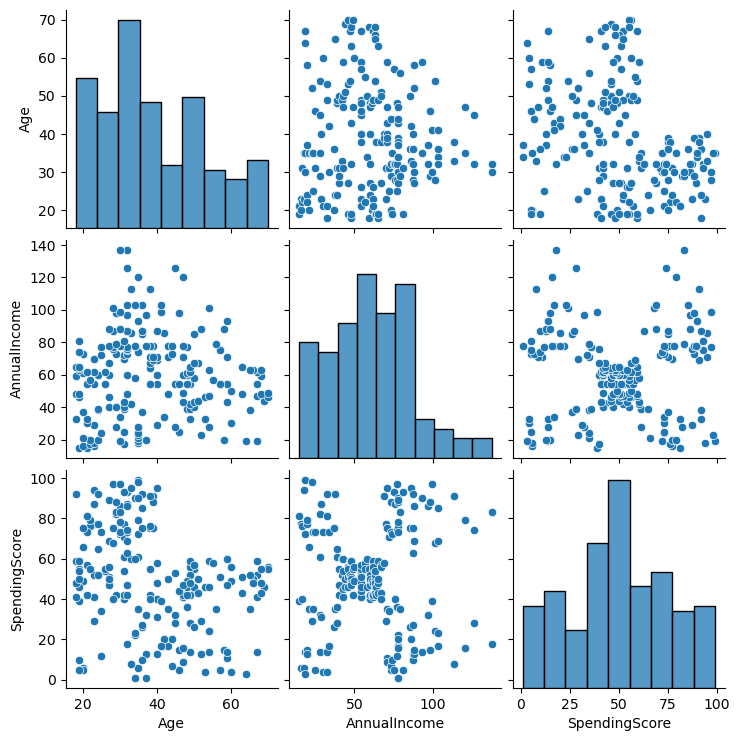

In [29]:
sns.pairplot(df[['Age', 'AnnualIncome','SpendingScore' ]])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

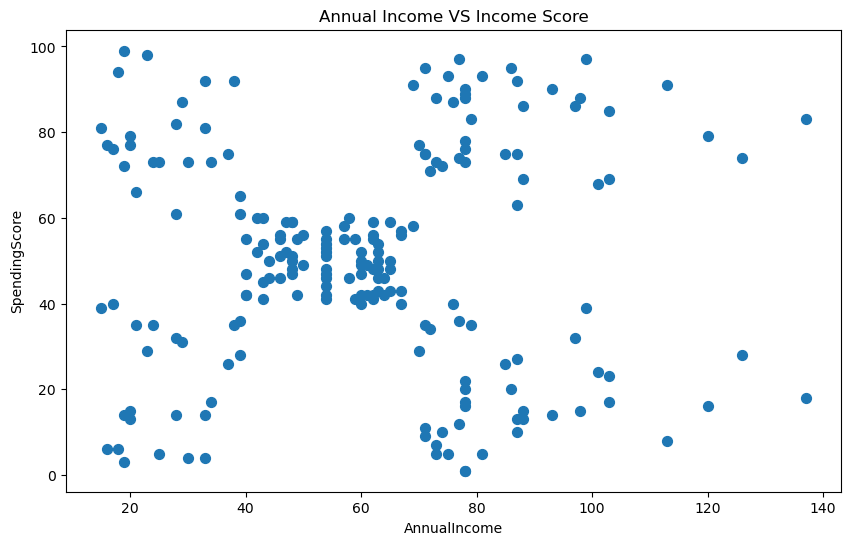

In [31]:
plt.figure(figsize = (10,6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'], s = 50)
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.title('Annual Income VS Income Score')
plt.show

In [43]:
from sklearn.cluster import KMeans
x = df[['AnnualIncome', 'SpendingScore']] 

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

## Explaining the Code

This code is implementing K-Means Clustering, a popular unsupervised learning algorithm, and computing the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters (1 to 10). Here's a step-by-step breakdown:

## 1. Importing Libraries
from sklearn.cluster import KMeans
Importing the KMeans class from sklearn.cluster.

## 2. Selecting Features
x = df[['AnnualIncome', 'SpendingScore']]
The dataset df is assumed to have columns named AnnualIncome and SpendingScore.
These two columns are selected as features for clustering. The clustering algorithm will group data points based on these features.

## 3. Initialize WCSS List

wcss = []
wcss (Within-Cluster Sum of Squares) is initialized as an empty list.
WCSS measures the variance within each cluster. A lower WCSS indicates that the data points are closer to their cluster centroid, suggesting better clustering.

## 4. Iterating over Different Numbers of Clusters

for i in range(1, 11):
A loop is used to calculate WCSS for different numbers of clusters ranging from 1 to 10.

## 5. Initializing K-Means Model

kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
* n_clusters=i: The number of clusters in this iteration.
* init='k-means++': An initialization method to place centroids in a smart way to speed up convergence.
* max_iter=300: Maximum number of iterations allowed for a single run.
* n_init=10: The algorithm runs 10 times with different centroid seeds, and the best one (with the lowest WCSS) is chosen.
* random_state=0: Ensures reproducibility by fixing the random seed.

## 6. Fitting the Model

kmeans.fit(x)
The K-Means algorithm is applied to the feature set x for the current number of clusters.

## 7. Computing WCSS

wcss.append(kmeans.inertia_)

* kmeans.inertia_: The WCSS for the current model (sum of squared distances of points to their nearest cluster center).
Appends this WCSS value to the wcss list.

* Output: 
After the loop, the wcss list will contain the WCSS values for 1 to 10 clusters. These values can be used to create an Elbow Plot to determine the optimal number of clusters.

## Why Use WCSS?
The Elbow Method is typically used to find the optimal number of clusters. In the Elbow Plot:

* The x-axis represents the number of clusters.
* The y-axis represents the WCSS values.

Look for the "elbow point" (where the rate of decrease in WCSS slows down). This point represents the optimal number of clusters.
Would you like to see how to plot the Elbow Curve or need help implementing the next step?

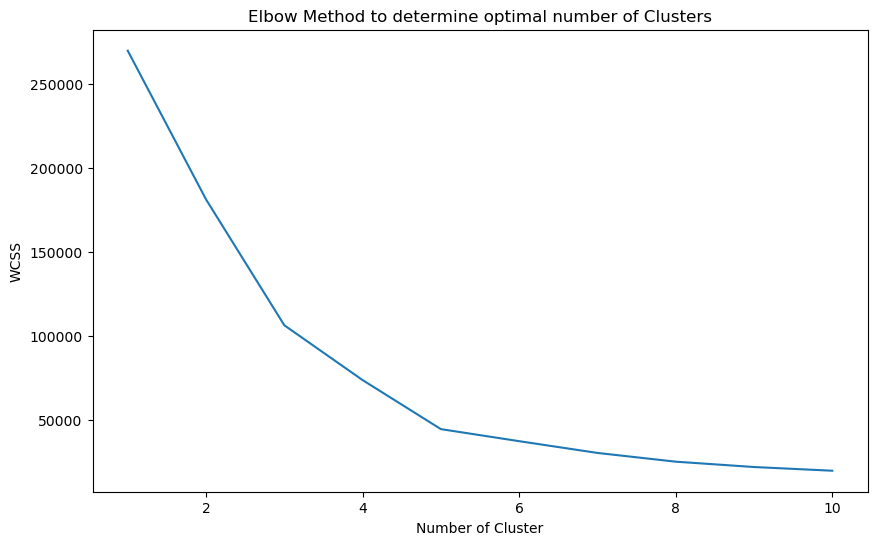

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method to determine optimal number of Clusters')
plt.show()

In [59]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
y_kmeans =kmeans.fit_predict(x)

In [61]:
df['Cluster'] = y_kmeans

In [63]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


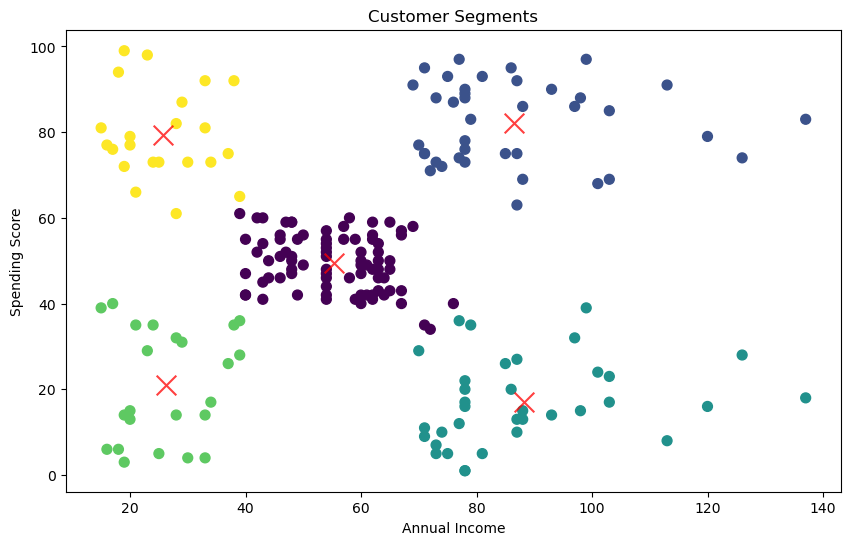

In [73]:
plt.figure(figsize=(10, 6))
plt.scatter (x.iloc[:, 0], x.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

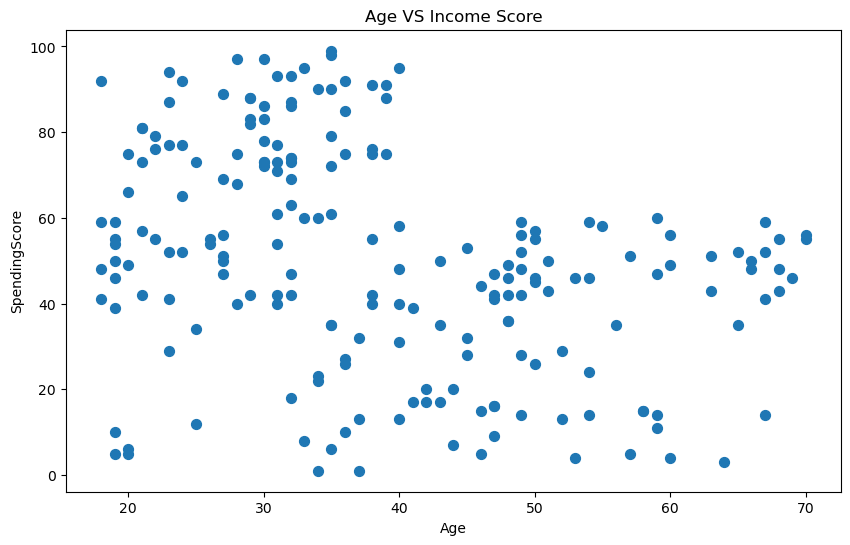

In [75]:
plt.figure(figsize = (10,6))
plt.scatter(df['Age'], df['SpendingScore'], s = 50)
plt.xlabel('Age')
plt.ylabel('SpendingScore')
plt.title('Age VS Income Score')
plt.show

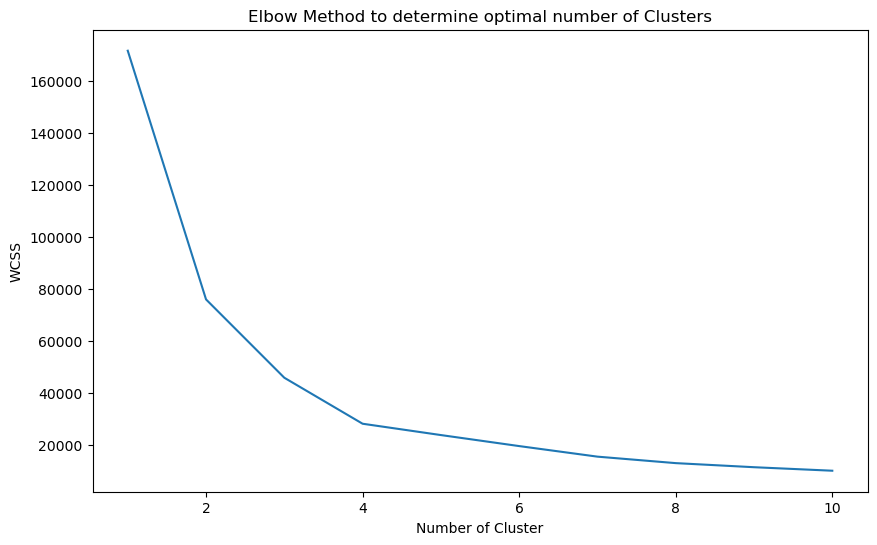

In [77]:
x = df[['Age', 'SpendingScore']] 

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method to determine optimal number of Clusters')
plt.show()

In [81]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
y_kmeans =kmeans.fit_predict(x)

In [83]:
df['ClusterAge'] = y_kmeans

In [85]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,ClusterAge
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,3
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1
196,197,Female,45,126,28,2,2
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,2,2


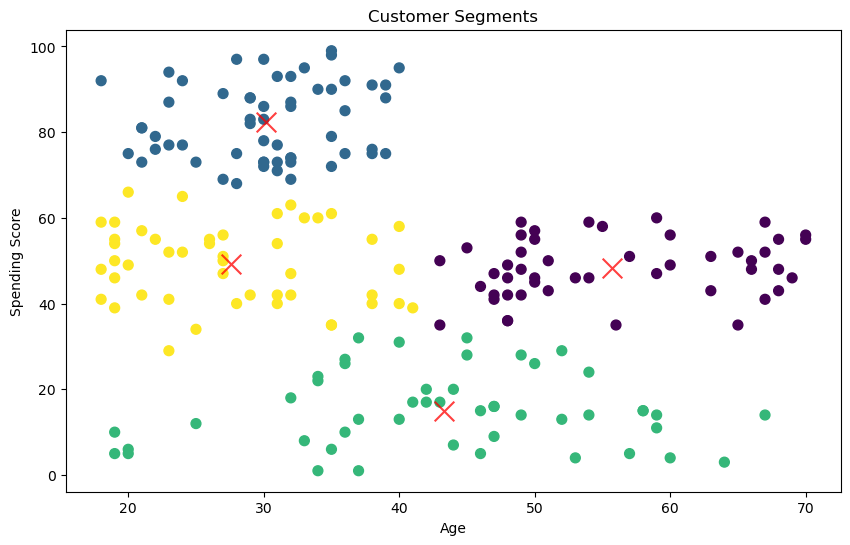

In [87]:
plt.figure(figsize=(10, 6))
plt.scatter (x.iloc[:, 0], x.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:,1], c='red', s=200, alpha=0.75, marker='x')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segments')
plt.show()

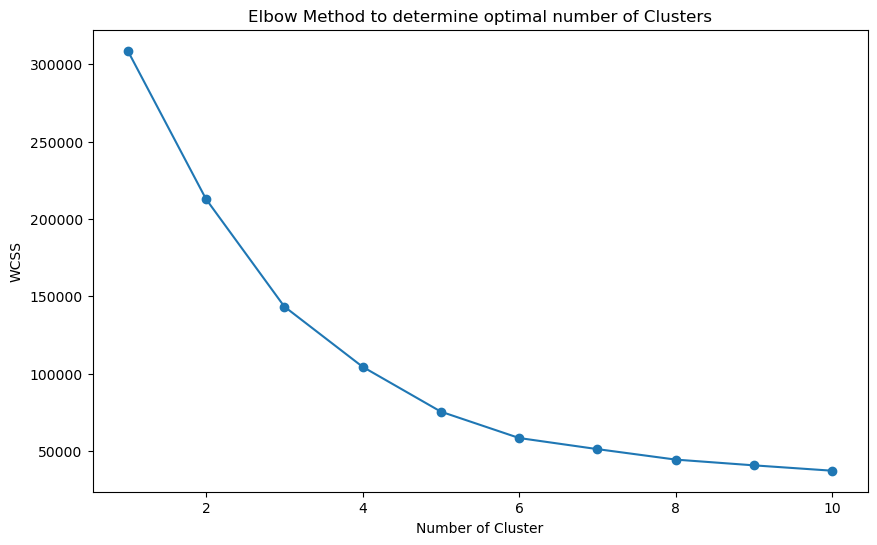

In [95]:
x = df[['Age', 'AnnualIncome', 'SpendingScore']] 

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method to determine optimal number of Clusters')
plt.show()

In [97]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
y_kmeans =kmeans.fit_predict(x)

df['ClusterAgeIncomeSpend'] = y_kmeans

In [99]:
df

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,Cluster,ClusterAge,ClusterAgeIncomeSpend
0,1,Male,19,15,39,3,3,4
1,2,Male,21,15,81,4,1,5
2,3,Female,20,16,6,3,2,4
3,4,Female,23,16,77,4,1,5
4,5,Female,31,17,40,3,3,4
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1,2
196,197,Female,45,126,28,2,2,1
197,198,Male,32,126,74,1,1,2
198,199,Male,32,137,18,2,2,1


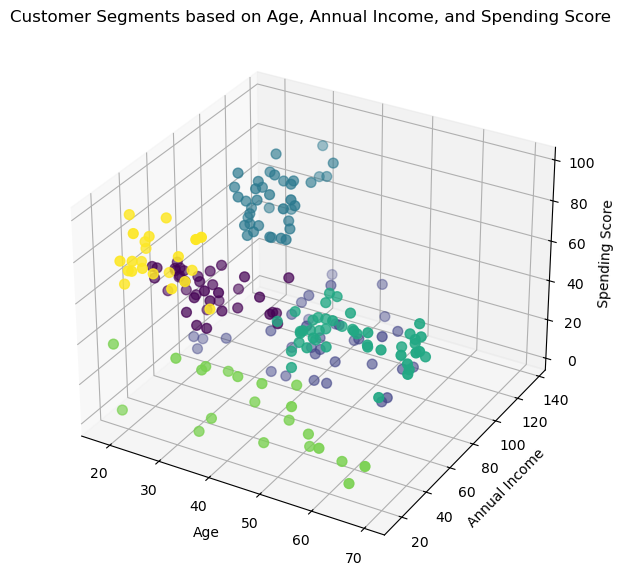

In [109]:
#Visualizing the clusters in a 3D plot from mpl toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot (111, projection='3d')
ax.scatter (df ['Age'], df['AnnualIncome'], df['SpendingScore'], c=df['ClusterAgeIncomeSpend'], s=50, cmap='viridis') 
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Segments based on Age, Annual Income, and Spending Score')
plt.show()